[View in Colaboratory](https://colab.research.google.com/github/Makbzuka/machine-learning-/blob/master/dropouttest.ipynb)

[0 1 2 3 4 5 6 7 8 9]
10
(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_65 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 7, 7, 64)          0         
_______________________________________________________

48000/48000 [==============================] - 99s 2ms/step - loss: 0.4689 - acc: 0.8277 - val_loss: 0.3309 - val_acc: 0.8817
Epoch 2/12
11520/48000 [======>.......................] - ETA: 1:08 - loss: 0.3042 - acc: 0.8905

48000/48000 [==============================] - 95s 2ms/step - loss: 0.2871 - acc: 0.8958 - val_loss: 0.2723 - val_acc: 0.8994
Epoch 3/12
14976/48000 [========>.....................] - ETA: 1:01 - loss: 0.2514 - acc: 0.9051

48000/48000 [==============================] - 94s 2ms/step - loss: 0.2427 - acc: 0.9109 - val_loss: 0.2582 - val_acc: 0.9027
Epoch 4/12
16320/48000 [=========>....................] - ETA: 57s - loss: 0.2075 - acc: 0.9234

48000/48000 [==============================] - 93s 2ms/step - loss: 0.2087 - acc: 0.9225 - val_loss: 0.2350 - val_acc: 0.9136
Epoch 5/12
16832/48000 [=========>....................] - ETA: 56s - loss: 0.1824 - acc: 0.9336

48000/48000 [==============================] - 93s 2ms/step - loss: 0.1869 - acc: 0.9309 - val_loss: 0.2555 - val_acc: 0.9099
Epoch 6/12
16960/48000 [=========>....................] - ETA: 59s - loss: 0.1684 - acc: 0.9371

48000/48000 [==============================] - 96s 2ms/step - loss: 0.1633 - acc: 0.9395 - val_loss: 0.2321 - val_acc: 0.9182
Epoch 7/12
17024/48000 [=========>....................] - ETA: 56s - loss: 0.1312 - acc: 0.9515

48000/48000 [==============================] - 92s 2ms/step - loss: 0.1392 - acc: 0.9485 - val_loss: 0.2374 - val_acc: 0.9189
Epoch 8/12
17088/48000 [=========>....................] - ETA: 55s - loss: 0.1125 - acc: 0.9592

48000/48000 [==============================] - 95s 2ms/step - loss: 0.1207 - acc: 0.9555 - val_loss: 0.2739 - val_acc: 0.9133
Epoch 9/12
17088/48000 [=========>....................] - ETA: 57s - loss: 0.0939 - acc: 0.9655

48000/48000 [==============================] - 93s 2ms/step - loss: 0.1026 - acc: 0.9622 - val_loss: 0.2435 - val_acc: 0.9224
Epoch 10/12
17024/48000 [=========>....................] - ETA: 56s - loss: 0.0788 - acc: 0.9708

48000/48000 [==============================] - 92s 2ms/step - loss: 0.0855 - acc: 0.9680 - val_loss: 0.2552 - val_acc: 0.9226
Epoch 11/12
17024/48000 [=========>....................] - ETA: 55s - loss: 0.0693 - acc: 0.9753

48000/48000 [==============================] - 91s 2ms/step - loss: 0.0738 - acc: 0.9729 - val_loss: 0.2707 - val_acc: 0.9209
Epoch 12/12
17024/48000 [=========>....................] - ETA: 55s - loss: 0.0539 - acc: 0.9808

48000/48000 [==============================] - 91s 2ms/step - loss: 0.0630 - acc: 0.9766 - val_loss: 0.2881 - val_acc: 0.9222
('test loss:', 0.3115019622206688)
('test-accu ;', 0.9188)


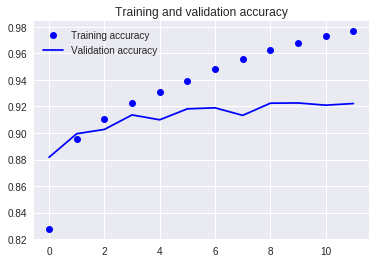

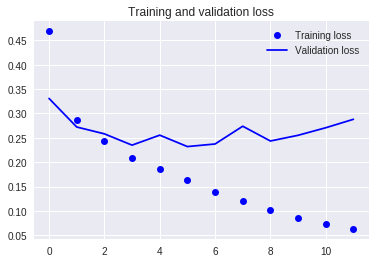

In [21]:
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import fashion_mnist 
from keras.models import Sequential,Input,Model
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
#print shape of datasets
'''
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape
'''
nclass = np.unique(y_train)
#no of classes in y train
print nclass
print len(nclass)

#turn the images into a vector
x_train =x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_1_test = to_categorical(y_test)
y_1_train = to_categorical(y_train)

train_x,valid_x,train_label,valid_label = train_test_split(x_train,y_1_train,test_size=0.2, random_state=13)

print train_x.shape,valid_x.shape,train_label.shape,valid_label.shape

batchsize = 64
epoch = 12
nclassess = 10

test = Sequential()
test.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
test.add(LeakyReLU(alpha=0.1))
test.add(MaxPooling2D((2, 2),padding='same'))
test.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
test.add(LeakyReLU(alpha=0.1))
test.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
test.add(LeakyReLU(alpha=0.1))                  
test.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test.add(Flatten())
test.add(Dense(128, activation='linear'))
test.add(LeakyReLU(alpha=0.1))                  
test.add(Dense(nclassess, activation='softmax'))
test.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
test.summary()
data_train = test.fit(train_x,train_label,batch_size=batchsize,epochs=epoch,verbose=1,validation_data=(valid_x,valid_label))
test_evaluation = test.evaluate(x_test,y_1_test,verbose=0)
print("test loss:",test_evaluation[0])
print("test-accu ;",test_evaluation[1])

accuracy = data_train.history['acc']
val_accuracy = data_train.history['val_acc']
loss = data_train.history['loss']
val_loss = data_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_57 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 64)          0         
__________

48000/48000 [==============================] - 110s 2ms/step - loss: 0.6017 - acc: 0.7753 - val_loss: 0.3805 - val_acc: 0.8595
Epoch 2/12
11328/48000 [======>.......................] - ETA: 1:19 - loss: 0.4053 - acc: 0.8490

48000/48000 [==============================] - 110s 2ms/step - loss: 0.3834 - acc: 0.8581 - val_loss: 0.3190 - val_acc: 0.8808
Epoch 3/12
14784/48000 [========>.....................] - ETA: 1:10 - loss: 0.3378 - acc: 0.8768

48000/48000 [==============================] - 109s 2ms/step - loss: 0.3343 - acc: 0.8764 - val_loss: 0.2948 - val_acc: 0.8890
Epoch 4/12
16128/48000 [=========>....................] - ETA: 1:08 - loss: 0.3084 - acc: 0.8844

48000/48000 [==============================] - 108s 2ms/step - loss: 0.3055 - acc: 0.8863 - val_loss: 0.2648 - val_acc: 0.9008
Epoch 5/12
16640/48000 [=========>....................] - ETA: 1:05 - loss: 0.2916 - acc: 0.8923

48000/48000 [==============================] - 104s 2ms/step - loss: 0.2849 - acc: 0.8954 - val_loss: 0.2456 - val_acc: 0.9086
Epoch 6/12
16832/48000 [=========>....................] - ETA: 1:04 - loss: 0.2734 - acc: 0.8963

48000/48000 [==============================] - 104s 2ms/step - loss: 0.2716 - acc: 0.8989 - val_loss: 0.2391 - val_acc: 0.9113
Epoch 7/12
16896/48000 [=========>....................] - ETA: 1:05 - loss: 0.2631 - acc: 0.9008

48000/48000 [==============================] - 102s 2ms/step - loss: 0.2623 - acc: 0.9022 - val_loss: 0.2306 - val_acc: 0.9148
Epoch 8/12
16896/48000 [=========>....................] - ETA: 1:00 - loss: 0.2524 - acc: 0.9045

48000/48000 [==============================] - 98s 2ms/step - loss: 0.2492 - acc: 0.9061 - val_loss: 0.2312 - val_acc: 0.9150
Epoch 9/12
17024/48000 [=========>....................] - ETA: 1:00 - loss: 0.2361 - acc: 0.9101

48000/48000 [==============================] - 99s 2ms/step - loss: 0.2416 - acc: 0.9097 - val_loss: 0.2235 - val_acc: 0.9173
Epoch 10/12
16960/48000 [=========>....................] - ETA: 59s - loss: 0.2350 - acc: 0.9108

48000/48000 [==============================] - 97s 2ms/step - loss: 0.2335 - acc: 0.9121 - val_loss: 0.2199 - val_acc: 0.9207
Epoch 11/12
16960/48000 [=========>....................] - ETA: 58s - loss: 0.2204 - acc: 0.9194

48000/48000 [==============================] - 98s 2ms/step - loss: 0.2283 - acc: 0.9151 - val_loss: 0.2181 - val_acc: 0.9194
Epoch 12/12
16960/48000 [=========>....................] - ETA: 1:02 - loss: 0.2206 - acc: 0.9179

48000/48000 [==============================] - 100s 2ms/step - loss: 0.2235 - acc: 0.9171 - val_loss: 0.2083 - val_acc: 0.9256
('test loss:', 0.22508907862901686)
('test-accu ;', 0.9188)


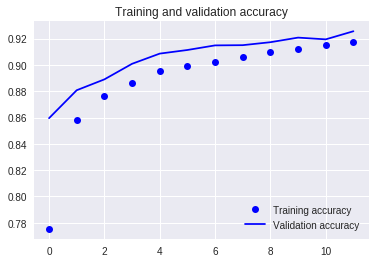

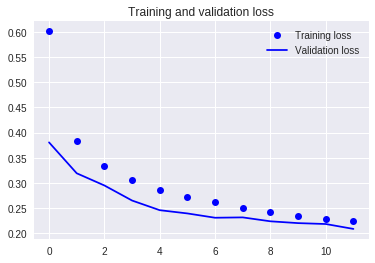

In [19]:
#add dropout function to improve accuracy
test = Sequential()
test.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
test.add(LeakyReLU(alpha=0.1))
test.add(MaxPooling2D((2, 2),padding='same'))
test.add(Dropout(0.25))
test.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
test.add(LeakyReLU(alpha=0.1))
test.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test.add(Dropout(0.25))
test.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
test.add(LeakyReLU(alpha=0.1))                  
test.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
test.add(Dropout(0.4))
test.add(Flatten())
test.add(Dense(128, activation='linear'))
test.add(LeakyReLU(alpha=0.1)) 
test.add(Dropout(0.3))
test.add(Dense(nclassess, activation='softmax'))
test.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
test.summary()
data_train = test.fit(train_x,train_label,batch_size=batchsize,epochs=epoch,verbose=1,validation_data=(valid_x,valid_label))
test_evaluation = test.evaluate(x_test,y_1_test,verbose=0)
print("test loss:",test_evaluation[0])
print("test-accu ;",test_evaluation[1])

accuracy = data_train.history['acc']
val_accuracy = data_train.history['val_acc']
loss = data_train.history['loss']
val_loss = data_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
print "hello colab"

hello colab
